# Lecture 21

**Standard import:**

In [1]:
import numpy as np

## Newton's method

Here the goal is to discuss the question: Which points converge to what root?

For find the roots, we have this version of Newton's method from last class:

In [2]:
def newtons_method(f, x_0, n, df=None, plot=False, field=RDF):
    var('x')
    if df is None:
        df(x) = f(x).derivative()
    x_0 = field(x_0)
    if plot:
        lines = []
        points = [(x_0, f(x_0))]
        old_x_0 = x_0
    for i in range(n):
        x_0 = field(x_0 - f(x_0)/df(x_0))
        if plot:
            lines.append([(x_0, 0), (old_x_0, f(old_x_0))])
            points.append((x_0, f(x_0)))
            old_x_0 = x_0
    if plot:
        from sage.plot.plot import plot as sage_plot
        plt = point2d(points, color='red', size=20, figsize=4)
        plt += sage_plot(f, color='blue', **plt.get_minmax_data())
        for line in lines:
            plt += line2d(line, thickness=1/2, color='black')
        show(plt)
    return x_0

### Working with Numpy Arrays

Unfortunately, applying a symbolic function to a numpy array causes issues. Sage has a [built in function `fast_callable`](https://doc.sagemath.org/html/en/reference/misc/sage/ext/fast_callable.html#sage.ext.fast_callable.fast_callable) that converts a Sage expression into something that can be applied to Numpy arrays (at least if the sage expression is simple enough).

Here is a demonstration:

In [6]:
x0 = np.linspace(0, 1, 11)
print(f'x0 = {x0}')
f(x) = sin(x)
try:
    f(x0)
except Exception as e:
    print(e)

x0 = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Numpy arrays are not supported as arguments for symbolic expressions


So even though `sin(x0)` works and `f(x) = sin(x)`, `f(x0)` does not work!

In [8]:
sin(x0)

array([0.        , 0.09983342, 0.19866933, 0.29552021, 0.38941834,
       0.47942554, 0.56464247, 0.64421769, 0.71735609, 0.78332691,
       0.84147098])

The answer is to use `fast_callable`:

In [10]:
x0 = np.linspace(0, 1, 11)
print(f'x0 = {x0}')
f(x) = sin(x)
f_np = fast_callable(f(x), vars=[x])
f_np(x0)

x0 = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


array([0.        , 0.09983342, 0.19866933, 0.29552021, 0.38941834,
       0.47942554, 0.56464247, 0.64421769, 0.71735609, 0.78332691,
       0.84147098])

Here is a version of Newton's method that is adapted to Numpy arrays.



In [11]:
def newtons_method_np(f, x_0, n, df=None):
    var('x')
    if df is None:
        df(x) = f(x).derivative()
    # Convert f and df to functions that can be applied to Numpy arrays
    f_np = fast_callable(f(x), vars=[x])
    df_np = fast_callable(df(x), vars=[x])
    for i in range(n):
        x_0 = x_0 - f_np(x_0)/df_np(x_0)
    return x_0

### Functions of one variable.

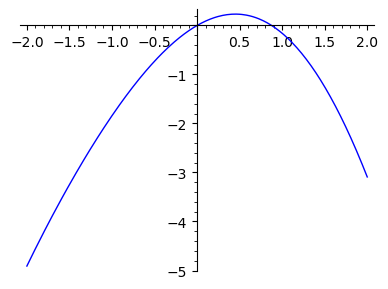

In [12]:
f(x) = sin(x) - x^2
graph = plot(f, (x, -2, 2), figsize=4)
graph

Here we find the two roots:

[0.0, 0.8767262153950625]


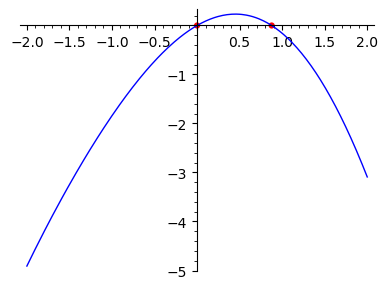

In [13]:
roots = [newtons_method(f, 0.0, 10), newtons_method(f, 1.0, 10)]
print(roots)
roots_plot = point2d([(r, 0) for r in roots], color='red', size=20)
graph + roots_plot

In [14]:
roots[1]

0.8767262153950625

In [15]:
f(roots[1])

0.0

In [16]:
x0 = np.linspace(-2, 2, 12)
print(x0)
x10 = newtons_method_np(f, x0, 10)
x10

[-2.         -1.63636364 -1.27272727 -0.90909091 -0.54545455 -0.18181818
  0.18181818  0.54545455  0.90909091  1.27272727  1.63636364  2.        ]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.87672622, 0.87672622, 0.87672622,
       0.87672622, 0.87672622])

In [17]:
root0_close = abs(x10-roots[0]) < 1/10
root0_close

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False])

In [18]:
root1_close = abs(x10-roots[1]) < 1/10
root1_close

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True])

This notation gets the `x0` values where `root0_close` is True.

In [19]:
x0[root0_close]

array([-2.        , -1.63636364, -1.27272727, -0.90909091, -0.54545455,
       -0.18181818,  0.18181818])

In [20]:
def color_points(x0, y0, xn, roots_to_colors, epsilon, args = {}):
    plt = None
    for r,c in roots_to_colors.items():
        close = abs(xn-r) < epsilon
        plt2 = point2d(zip(x0[close], y0[close]), color=c, zorder=2, **args)
        if plt is None:
            plt = plt2
        else:
            plt += plt2
    return plt

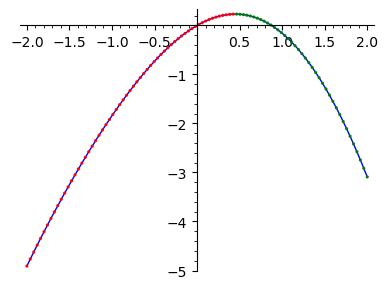

In [21]:
x0 = np.linspace(-2, 2, 100)
y0 = fast_callable(f(x), vars=[x])(x0)
xn = newtons_method_np(f, x0, 100)
roots_to_colors = {roots[0]:'red', roots[1]:'green'}
epsilon = 1/100
graph + color_points(x0, y0, xn, roots_to_colors, epsilon, args=dict(size=5))

### Another example

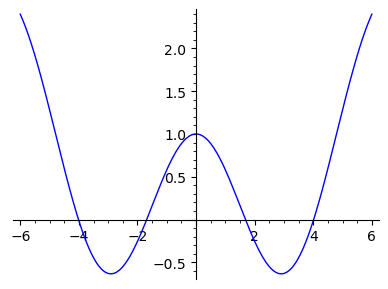

In [22]:
a = -6
b = 6
f(x) = cos(x) + x^2/25
graph = plot(f, (x, a, b), figsize=4)
graph

In [23]:
roots = [-4, -2, 2, 4]
roots = [newtons_method(f, r, 100) for r in roots]
roots

[-4.012616506373914,
 -1.6845498172312936,
 1.6845498172312936,
 4.012616506373914]

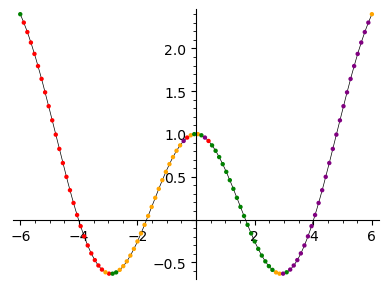

In [24]:
a = -6
b = 6
graph = plot(f, (a, b), thickness=0.5, color='black', figsize=4)
x0 = np.linspace(a, b, 100)
y0 = fast_callable(f(x), vars=[x])(x0)
xn = newtons_method_np(f, x0, 100)
roots_to_colors = {roots[0]:'red', roots[1]:'orange', roots[2]:'green', roots[3]:'purple'}
epsilon = 1/100
graph + color_points(x0, y0, xn, roots_to_colors, epsilon)

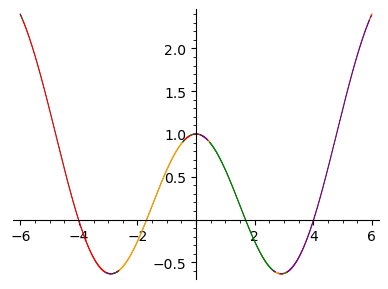

In [25]:
a = -6
b = 6
x0 = np.linspace(a, b, 1000)
y0 = fast_callable(f(x), vars=[x])(x0)
graph = plot(f, (a, b), thickness=0.5, color='black')
xn = newtons_method_np(f, x0, 100)
epsilon = 1/100
graph + color_points(x0, y0, xn, roots_to_colors, epsilon, args=dict(size=1, figsize=4))

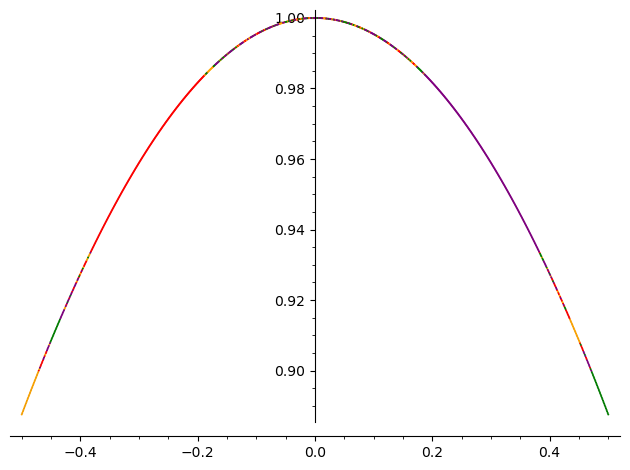

In [26]:
a = -1/2
b = 1/2
x0 = np.linspace(a, b, 1000)
y0 = fast_callable(f(x), vars=[x])(x0)
graph = plot(f, (a, b), thickness=0.5, color='black')
xn = newtons_method_np(f, x0, 100)
epsilon = 1/100
graph + color_points(x0, y0, xn, roots_to_colors, epsilon, args=dict(size=2))

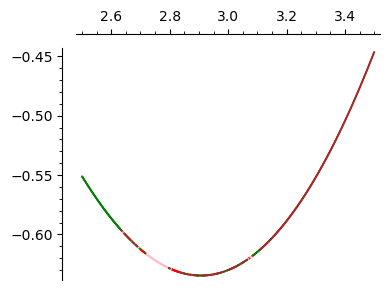

In [27]:
a = 2.5
b = 3.5
graph = plot(f, (a, b), thickness=0.5, color='black')
x0 = np.linspace(a, b, 1000)
y0 = fast_callable(f(x), vars=[x])(x0)
xn = newtons_method_np(f, x0, 1000)
roots_to_colors = {roots[0]:'red', roots[1]:'pink', roots[2]:'green', roots[3]:'brown'}
epsilon = 1/100
colored_points = color_points(x0, y0, xn, roots_to_colors, epsilon, args=dict(size=2, figsize=4))
graph + colored_points

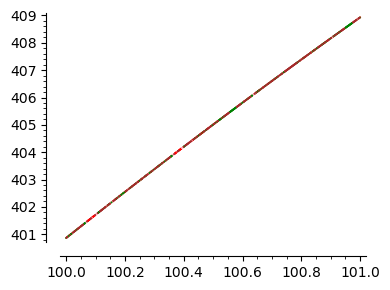

In [28]:
a = 100
b = 101
graph = plot(f, (a, b), thickness=0.5, color='black')
x0 = np.linspace(a, b, 1000)
y0 = fast_callable(f(x), vars=[x])(x0)
xn = newtons_method_np(f, x0, 1000)
roots_to_colors = {roots[0]:'red', roots[1]:'pink', roots[2]:'green', roots[3]:'brown'}
epsilon = 1/100
colored_points = color_points(x0, y0, xn, roots_to_colors, epsilon, args=dict(size=2, figsize=4))
graph + colored_points

## In two dimensions

Here we will draw Newton fractals for two-dimensional maps $f:\mathbb R^2 \to \mathbb R^2$. We'll start with the following example.

In [29]:
f(x,y) = (
    x^2/4 + y^2 - 1,
    x^2 + y^2/4 - 1,
)

The roots are solutions to $f(x,y)=(0,0)$. These may be thought of as points on the intersections of two level sets: 
$$f_1(x,y)=0 \quad \text{and} \quad f_2(x,y)=0.$$ We plot these level sets below:

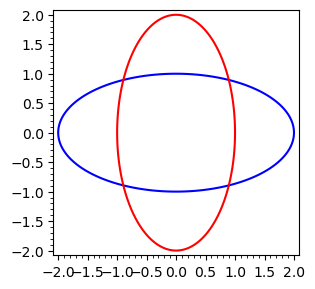

In [30]:
implicit_plot(f[0]==0, (x, -2, 2), (y, -2, 2), figsize=4)+implicit_plot(f[1]==0, (x, -2, 2), (y, -2, 2), color='red')

Note that the level sets are ellipses centered at the origin with major and minor axes being the $x$- and $y$-axes. The major radius is $2$ and the minor radius is $1$. Because of the symmetry, the four roots have the form $(\pm c, \pm c)$ for some choice of $c$ (and all possible signs).

The following function returns a sage function that sends a pair `(x,y)` to the image of the point obtained by applying one step of  Newton's method. We take some care to simplify the expression. This works for any Sage function `f(x,y)`.

In [31]:
def newton_2d_one_iterate(f):
    var('x y')
    Df_inv = f.derivative()(x,y).inverse()
    for i in range(2):
        for j in range(2):
            Df_inv[i,j] = Df_inv[i,j].full_simplify()
    nm(x,y) = vector([x,y])-Df_inv*vector(f(x,y))
    nm[0] = nm[0].full_simplify()
    nm[1] = nm[1].full_simplify()
    return nm

In [32]:
nm = newton_2d_one_iterate(f)
show(nm)

(x, y) |--> (1/10*(5*x^2 + 4)/x, 1/10*(5*y^2 + 4)/y)

We note that one of the root is pretty close to $(1,1)$. We'll apply Newton's method 10 times to find a better approximation.

In [33]:
p0 = (1.0,1.0)
pn = p0
for i in range(10):
    pn = nm(*pn)
pn

(0.894427190999916, 0.894427190999916)

Here we collect all the roots:

In [34]:
root_coord = pn[0]
roots = [
    vector(RDF, [s1*root_coord, s2*root_coord], immutable=True)
    for s1 in range(-1,3,2) for s2 in range(-1,3,2)
]
roots

[(-0.8944271909999157, -0.8944271909999157),
 (-0.8944271909999157, 0.8944271909999157),
 (0.8944271909999157, -0.8944271909999157),
 (0.8944271909999157, 0.8944271909999157)]

The following code makes variables `xmesh` and `ymesh` equal to $x$- and $y$-coordinate values in a grid. In otherwords the positions in the square arrays printed below represent positions in the box $[-R, R] \times [-R, R]$. The first array `xmesh` gives the $x$-coordinates of those points, and the second `ymesh` gives the $y$-coordinates.

In [35]:
R = 1.5
N = 4
x = np.linspace(-R, R, N)
y = np.linspace(-R, R, N)
xmesh, ymesh = np.meshgrid(x,y)
print(xmesh)
print()
print(ymesh)

[[-1.5 -0.5  0.5  1.5]
 [-1.5 -0.5  0.5  1.5]
 [-1.5 -0.5  0.5  1.5]
 [-1.5 -0.5  0.5  1.5]]

[[-1.5 -1.5 -1.5 -1.5]
 [-0.5 -0.5 -0.5 -0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 1.5  1.5  1.5  1.5]]


Below we provide a method to iterate Newton's method on a Numpy array. The inputs are a Sage function `f(x,y)`, two numpy arrays `x_0` and `y_0` representing the $x$- and $y$-coordinates of some points (as above) and `n` which is the number of times to iterate.

In [36]:
def newtons_method_2d_np(f, x_0, y_0, n):
    var('x y')
    # Get the sage function that iterates Newton's method once:
    nm = newton_2d_one_iterate(f)

    # The function nm has two components. We convert each to fast_callable functions that
    # can be applied to Numpy arrays.
    x_update_map = fast_callable(nm(x,y)[0], vars=[x, y])
    y_update_map = fast_callable(nm(x,y)[1], vars=[x, y])

    for i in range(n):
        # We get the new x-values and y-values
        x_1 = x_update_map(x_0, y_0)
        y_1 = y_update_map(x_0, y_0)
        # Then store them back in the original variables so we can iterate
        x_0 = x_1
        y_0 = y_1
    return x_0, y_0

You can see after `10` steps, everything in our grid converges to one of the roots:

In [37]:
newtons_method_2d_np(f, xmesh, ymesh, 10)

(array([[-0.89442719, -0.89442719,  0.89442719,  0.89442719],
        [-0.89442719, -0.89442719,  0.89442719,  0.89442719],
        [-0.89442719, -0.89442719,  0.89442719,  0.89442719],
        [-0.89442719, -0.89442719,  0.89442719,  0.89442719]]),
 array([[-0.89442719, -0.89442719, -0.89442719, -0.89442719],
        [-0.89442719, -0.89442719, -0.89442719, -0.89442719],
        [ 0.89442719,  0.89442719,  0.89442719,  0.89442719],
        [ 0.89442719,  0.89442719,  0.89442719,  0.89442719]]))

The following function plots colors initial points according to which root they land at after iteration. The function doesn't do the iteration, we leave that to the user. Here are the options:

* `x0` and `y0`: Initial $x$- and $y$-coordinates as two Numpy arrays (as above).
* `xn` and `yn`: The $x$- and $y$-coordinates after applying Newton's method some number of times.
* `roots_to_colors`: A function mapping roots to colors to use for the points that converge to the given root.
* `epsilon`: A tolerance, points are considered to converge if their distance from the root after iteration is less than `epsilon`.
* `args`: A dictionary of keyword arguments that are passed to `point2d` which draws the points.

In [38]:
def color_points_2d(x0, y0, xn, yn, roots_to_colors, epsilon, args = {}):
    # Start with an empty plot
    plt = Graphics()
    for r,c in roots_to_colors.items():
        # This creates a Numpy array `close` of boolean values with value `True`
        # if a point is within distance epsilon of the root `r` and `False`
        # otherwise:
        close = (xn-r[0])^2 + (yn-r[1])^2 < epsilon^2
        # Calling `x0[close]` selects just the xcoordinates for which the cooresponding
        # entry of `close` is True. We zip with `y0[close]` to get the collection of 
        # initial pairs of coordinates that iterate close to the root `r`.
        plt += point2d(zip(x0[close], y0[close]), color=c, zorder=2, **args)
    return plt

Here we use a $100 \times 100$ grid of points in the box $[-1.5, 1.5] \times [-1.5, 1.5]$. We iterate Newton's method $30$ steps and color the grid of points according to which root they land at.

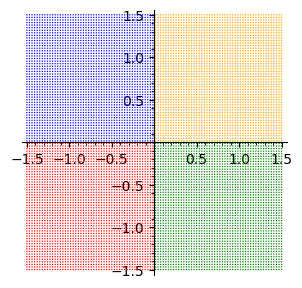

In [39]:
R = 1.5
N = 100
x_ls = np.linspace(-R, R, N)
y_ls = np.linspace(-R, R, N)
xmesh, ymesh = np.meshgrid(x_ls,y_ls)
xn, yn = newtons_method_2d_np(f, xmesh, ymesh, 20)
roots_to_colors = {roots[0]:'red', roots[1]:'blue', roots[2]:'green', roots[3]:'orange'}
epsilon = 1/100
plt = color_points_2d(xmesh, ymesh, xn, yn, roots_to_colors, epsilon, args=dict(size=1, figsize=4))
show(plt, aspect_ratio=1)

This example is somewhat boring: Each open quadrant is attracted to the root in that quadrant. For points on the axes, you can see that Newton's method is undefined.

In [40]:
try:
    print(nm(x,0))
except ValueError as e:
    print(e)
try:
    print(nm(0,y))
except ValueError as e:
    print(e)

power::eval(): division by zero
power::eval(): division by zero


# A six-fold symmetric 2D example

For one of our level sets, we'll use the so-called [*monkey saddle*](https://en.wikipedia.org/wiki/Monkey_saddle):
$$z = x^3 - 3 x y^2.$$
It is like a sandard saddle ($z=xy$) but has room for a Monkey's tail to hang down in addition to its two legs. Here is our function $f:\mathbb R^2 \to \mathbb R^2$:

In [41]:
f(x,y) = (
    x^2 + y^2 - 1,
    x^3 - 3*x*y^2,
)

Here we plot the monkey saddle.

In [42]:
plot3d(f[1], (x, -1, 1), (y, -1, 1))

Graphics3d Object

A contour plot makes the symmetries more clear:

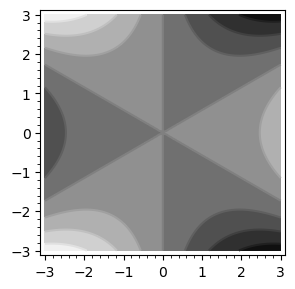

In [43]:
var('x y')
show(contour_plot(x^3 - 3*x*y^2, (x, -3, 3), (y, -3, 3)), figsize=4)

The function $f$ is preserved by precomposition by a rotation of the plane (fixing the origin) by $120^\circ$. If $r$ is a rotation of the plane by $60^\circ$, then $f \circ r = -f$. The contour plot shows that the level set $f=0$ consists of three lines through the origin:

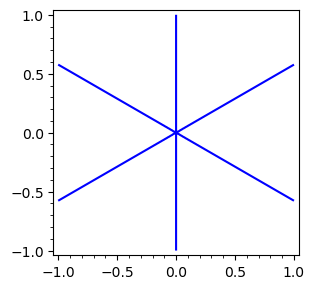

In [44]:
show(implicit_plot(x^3 - 3*x*y^2, (x, -1, 1), (y, -1, 1)), figsize=4)

Thinking of these lines in space (in the plane $z=0$), the graph of $f$ is preserved by $180^\circ$ rotation about each of these lines.

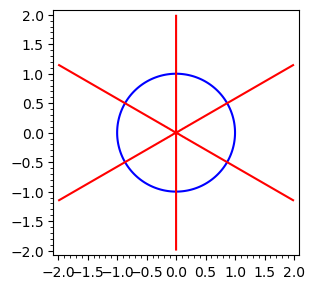

In [45]:
implicit_plot(f[0]==0, (x, -2, 2), (y, -2, 2), figsize=4)+implicit_plot(f[1]==0, (x, -2, 2), (y, -2, 2), color='red')

The roots are the intersections of the unit circle with the red lines, which are the $y$-axis and rotations of the $y$-axis by multiples of $60^\circ$. So, they are easy to compute:

In [46]:
roots = [
    vector(RDF, [cos(pi/2 + i*pi/3), sin(pi/2 + i*pi/3)], immutable=True)
    for i in range(6)
]
roots

[(0.0, 1.0),
 (-0.8660254037844387, 0.5),
 (-0.8660254037844387, -0.5),
 (0.0, -1.0),
 (0.8660254037844387, -0.5),
 (0.8660254037844387, 0.5)]

We use our function `newton_2d_one_iterate` to get the formula one iteration of Newton's method:

In [47]:
nm = newton_2d_one_iterate(f)
show(nm)

(x, y) |--> (1/3*(5*x^3 - 3*x*y^2 + 3*x)/(3*x^2 - y^2), -1/6*(x^4 + 3*y^4 - 3*(4*x^2 - 1)*y^2 - 3*x^2)/(3*x^2*y - y^3))

Here is the same function but in factored form:

In [48]:
nm[0] = nm[0].factor()
nm[1] = nm[1].factor()
show(nm)

(x, y) |--> (1/3*(5*x^2 - 3*y^2 + 3)*x/(3*x^2 - y^2), -1/6*(x^4 - 12*x^2*y^2 + 3*y^4 - 3*x^2 + 3*y^2)/((3*x^2 - y^2)*y))

We chekc that the roots are indeed roots:

In [49]:
for i in range(6):
    print(f(*roots[i]))

(0.0, 0)
(1.1102230246251565e-16, -1.1102230246251565e-16)
(1.1102230246251565e-16, -1.1102230246251565e-16)
(0.0, 0)
(1.1102230246251565e-16, 1.1102230246251565e-16)
(1.1102230246251565e-16, 1.1102230246251565e-16)


We will attempt to use rainbow colors:

In [50]:
roots_to_colors = {roots[0]:'red', roots[1]:'orange', roots[2]:'yellow', 
                   roots[3]:'green', roots[4]:'blue', roots[5]:'purple'}

Here we use a $406\times406$ grid over the square $[-1.5, 1.5] \times [-1.5, 1.5]$ to plot which of the roots a point converges to after 20 iterates. (We chose `406` because this seems to be an optimal grid so that there is one point per pixel.

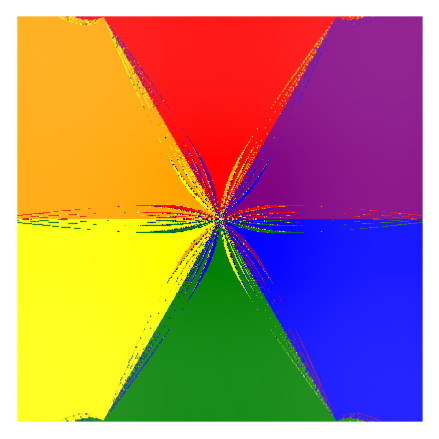

In [51]:
R = 1.5
N = 406
x_ls = np.linspace(-R, R, N)
y_ls = np.linspace(-R, R, N)
xmesh, ymesh = np.meshgrid(x_ls,y_ls)
xn, yn = newtons_method_2d_np(f, xmesh, ymesh, 20)
epsilon = 1/100
color_points_2d(xmesh, ymesh, xn, yn, roots_to_colors, epsilon, 
                args=dict(size=1, figsize=6, aspect_ratio=1, axes=False))

Here is a closer up view of the "snowflake" in the middle:

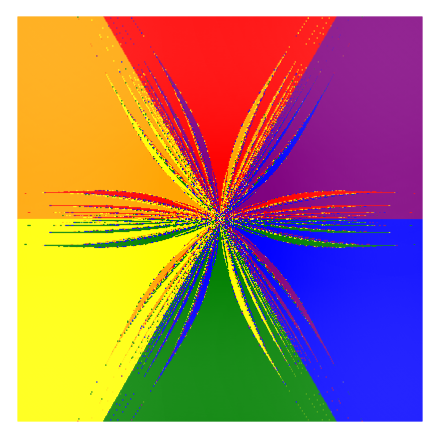

In [52]:
R = 0.75
N = 406
x_ls = np.linspace(-R, R, N)
y_ls = np.linspace(-R, R, N)
xmesh, ymesh = np.meshgrid(x_ls,y_ls)
xn, yn = newtons_method_2d_np(f, xmesh, ymesh, 20)
epsilon = 1/100
color_points_2d(xmesh, ymesh, xn, yn, roots_to_colors, epsilon, 
                args=dict(size=1, figsize=6, aspect_ratio=1, axes=False))

We zoom out to $[-5, 5] \times [-5, 5]$:

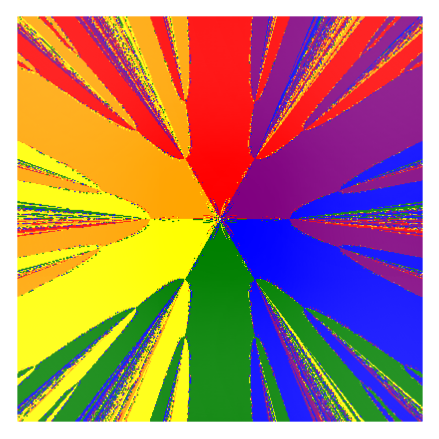

In [53]:
R = 5
N = 406
x_ls = np.linspace(-R, R, N)
y_ls = np.linspace(-R, R, N)
xmesh, ymesh = np.meshgrid(x_ls,y_ls)
xn, yn = newtons_method_2d_np(f, xmesh, ymesh, 20)
epsilon = 1/100
plt = color_points_2d(xmesh, ymesh, xn, yn, roots_to_colors, epsilon, 
                      args=dict(size=1, figsize=6, aspect_ratio=1, axes=False))
plt.save_image('rainbow_snowflake_zoom_out_4.png')
plt

Here we take a look at one of the points where "branching" occurs:

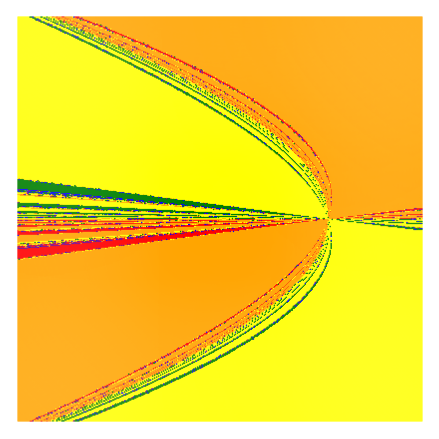

In [54]:
R = 5
N = 406
x_ls = np.linspace(-2.5, -1.5, N)
y_ls = np.linspace(-0.5, 0.5, N)
xmesh, ymesh = np.meshgrid(x_ls,y_ls)
xn, yn = newtons_method_2d_np(f, xmesh, ymesh, 20)
epsilon = 1/100
plt = color_points_2d(xmesh, ymesh, xn, yn, roots_to_colors, epsilon, 
                      args=dict(size=1, figsize=6, aspect_ratio=1, axes=False))
plt

Here we create some larger pictures:

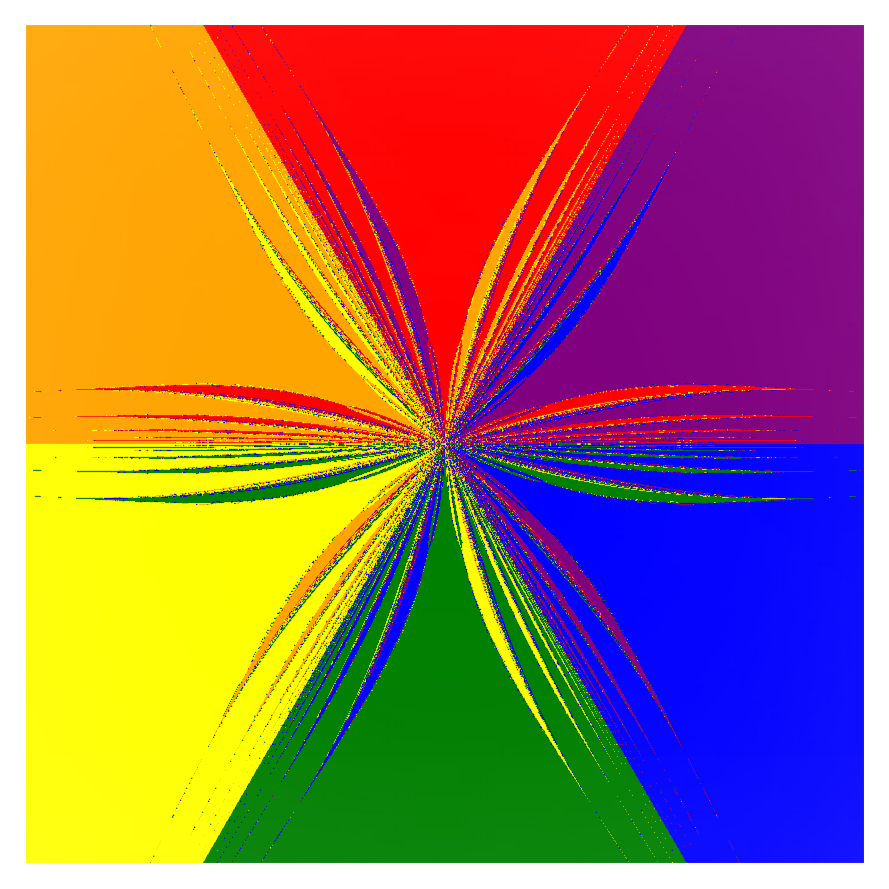

In [55]:
R = 0.75
N = 838
x_ls = np.linspace(-R, R, N)
y_ls = np.linspace(-R, R, N)
xmesh, ymesh = np.meshgrid(x_ls,y_ls)
xn, yn = newtons_method_2d_np(f, xmesh, ymesh, 30)
epsilon = 1/100
plt = color_points_2d(xmesh, ymesh, xn, yn, roots_to_colors, epsilon, 
                      args=dict(size=1, figsize=12, aspect_ratio=1, axes=False))
plt.save_image('rainbow_snowflake_12.png')
plt

This is an example of a *Newton Fractal*. Formally the Newton fractal is the set of points which do not accumulate on a root. This set is closed, and presumably fractal in nature. These are often studied in connection with the use of Newton's method in the complex plane, especially for polynomials. While the example above is an application of Newton's method to real valued functions $\mathbb R^2 \to \mathbb R^2$, it is not complex analytic, so the pictures seem a bit different than the ones you'll find online and in the following references.

*References:*

* [3Blue1Brown's video on Newton fractals](https://www.3blue1brown.com/lessons/newtons-fractal): Both a video and an interactive app.
* J. H. Hubbard, D. Schleicher, S. Sutherland, [*How to Find All Roots of Complex Polynomials by Newton's Method*](https://www.math.stonybrook.edu/~scott/Papers/Newton-HSS.pdf), Inventiones Mathematicae vol. 146 (2001)

## Using PIL

The method above seems to yield pretty good results if you are really careful about the size of the images.

We get better results using the [Python image library PILLOW `PIL`](https://python-pillow.org/). We used this briefly before when creating Julia sets.

In [56]:
from PIL import Image, ImagePalette

The following will create an array of colors for points in a grid with coordinates given by `x0` and `y0` as above. We will use `0` to indicate that a point has not converged to a root, and integers `1, 2, 3, ..., n` to represent convergence to the $n$ roots. 

In [57]:
def color_array(x0, y0, xn, yn, roots, epsilon, args = {}):
    colors = np.zeros(x0.shape, dtype=int)
    for i,r in enumerate(roots):
        close = (xn-r[0])^2 + (yn-r[1])^2 < epsilon^2
        colors += np.where(close, i+1, 0)
    return colors.astype(np.uint8)

*Remark:* We use data type `np.uint8` because PIL uses $8$-bit integers when working with a color pallette. I had errors when I first tried this, because the `dtype` was just standard `int`.

Here we use the same example as above but with just a small grid so we can see what is going on. All our points converge to roots, so we don't see any zeros:

In [58]:
R = 0.75
N = 10
x_ls = np.linspace(-R, R, N)
y_ls = np.linspace(-R, R, N)
xmesh, ymesh = np.meshgrid(x_ls,y_ls)
xn, yn = newtons_method_2d_np(f, xmesh, ymesh, 30)
epsilon = 1/100
colors = color_array(xmesh, ymesh, xn, yn, roots_to_colors, epsilon)
colors

array([[3, 3, 4, 4, 4, 4, 4, 4, 5, 5],
       [3, 3, 3, 4, 4, 4, 4, 5, 5, 5],
       [3, 3, 3, 3, 4, 4, 5, 5, 5, 5],
       [3, 3, 3, 2, 4, 4, 6, 5, 5, 5],
       [3, 3, 1, 4, 2, 6, 4, 1, 5, 5],
       [2, 2, 4, 1, 3, 5, 1, 4, 6, 6],
       [2, 2, 2, 3, 1, 1, 5, 6, 6, 6],
       [2, 2, 2, 2, 1, 1, 6, 6, 6, 6],
       [2, 2, 2, 1, 1, 1, 1, 6, 6, 6],
       [2, 2, 1, 1, 1, 1, 1, 1, 6, 6]], dtype=uint8)

We create an image with mode `'P'` meaning palette and then install add a pallette to the image with `img.putpalette()`. To construct a pallette we pass a list of integers with value between $0$ and $255$. Each color corresponds to three consecutive integers: the red, green, and blue components of the colors (because the palette will be a `"RGB"`). Positions with number `i` in the image matrix will be assigned colors using the array entries `palette[3*i]`, `palette[3*i+1]`, and `palette[3*i+2]`. In our case color `0` will be black, and then we use six colors from the rainbow. We produce a small image below.

In [59]:
img = Image.fromarray(colors, mode='P')
palette = [
       0,   0,   0, # Each triple is the amount of red, green and blue
     255,   0,   0, # as numbers 0 - 255 # RED
     255, 255,   0,                      # 
       0, 255,   0,
       0, 255, 255,
       0,   0, 255,
     255,   0, 255,
]
img_palette = ImagePalette.ImagePalette("RGB", palette)
img.putpalette(img_palette)
img

We place all the code above into a convienience function:

In [60]:
def colors_to_image(colors):
    img = Image.fromarray(colors, mode='P')
    palette = [
           0,   0,   0, # Each triple is the amount of red, green and blue
         255,   0,   0, # as numbers 0 - 255
         255, 255,   0,
           0, 255,   0,
           0, 255, 255,
           0,   0, 255,
         255,   0, 255,
    ]
    #palette += (3*256 - len(palette))*[0]
    #assert len(palette) == 3*256
    img_palette = ImagePalette.ImagePalette("RGB", palette)
    img.putpalette(img_palette)
    return img

Here we generate a $600 \times 600$ image:

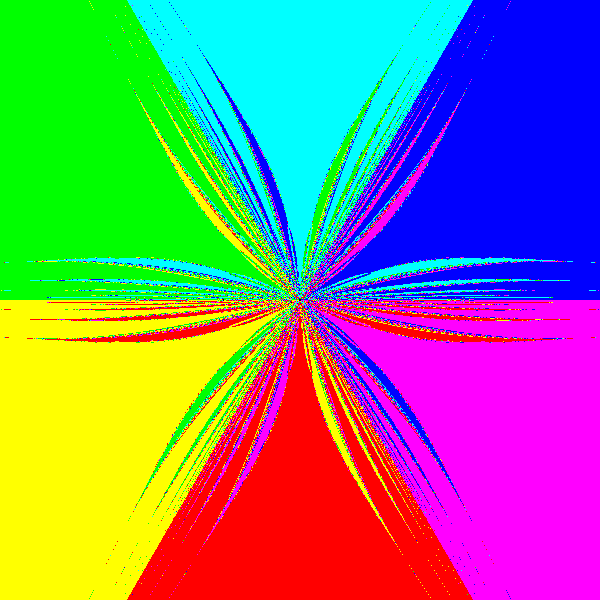

In [61]:
R = 0.75
N = 600
x_ls = np.linspace(-R, R, N)
y_ls = np.linspace(-R, R, N)
xmesh, ymesh = np.meshgrid(x_ls,y_ls)
xn, yn = newtons_method_2d_np(f, xmesh, ymesh, 30)
epsilon = 1/100
colors = color_array(xmesh, ymesh, xn, yn, roots_to_colors, epsilon)
img = colors_to_image(colors)
img

The image can be saved with `img.save("filename.png")`. Here is a function that saves an image of size $N \times N$ of the $[-R,R] \times [-R, R]$ square:

In [62]:
def save_snowflake_image(R, N):
    x_ls = np.linspace(-R, R, N)
    y_ls = np.linspace(-R, R, N)
    xmesh, ymesh = np.meshgrid(x_ls,y_ls)
    xn, yn = newtons_method_2d_np(f, xmesh, ymesh, 30)
    epsilon = 1/100
    colors = color_array(xmesh, ymesh, xn, yn, roots, epsilon)
    img = colors_to_image(colors)
    img.save(f'rainbow_snowflake_R{R:0.2f}_N{N}.png')

In [63]:
# save_snowflake_image(10, 8000)

Here are some pictures created by using `N=8000` and then rescaling the image to be $600 \times 600$ using [GIMP](https://www.gimp.org/) (any image manipulation app will work- You can probably even get PIL to do it). This rescaling gives less grainy images:

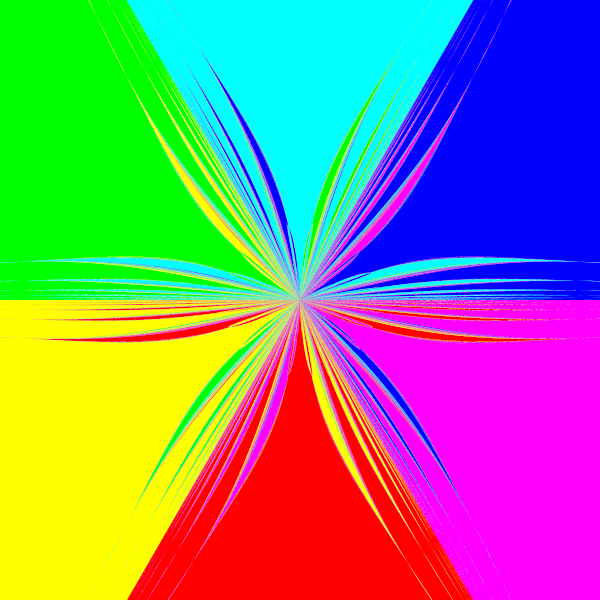

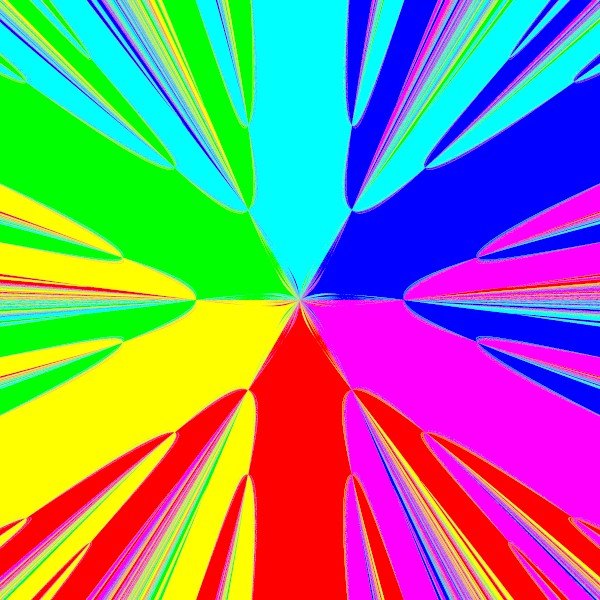

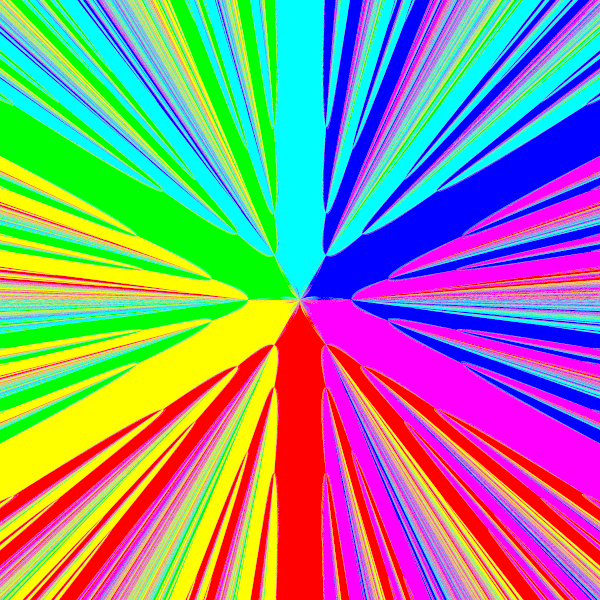

## Highlighting the fractal

As mentioned above, the *Newton fractal* is the collection of points that do not lie in the interior of one of the colored regions. This is a closed set. Here we attempt to draw this using the same sort of approach as the above.

We work through a small example so we can see what is going on. Heere we repeat the above, getting a grid of numbers $1$-$6$ representing the roots.

In [64]:
R = 0.75
N = 10
x_ls = np.linspace(-R, R, N)
y_ls = np.linspace(-R, R, N)
xmesh, ymesh = np.meshgrid(x_ls,y_ls)
xn, yn = newtons_method_2d_np(f, xmesh, ymesh, 30)
epsilon = 1/100
colors = color_array(xmesh, ymesh, xn, yn, roots_to_colors, epsilon)
colors

array([[3, 3, 4, 4, 4, 4, 4, 4, 5, 5],
       [3, 3, 3, 4, 4, 4, 4, 5, 5, 5],
       [3, 3, 3, 3, 4, 4, 5, 5, 5, 5],
       [3, 3, 3, 2, 4, 4, 6, 5, 5, 5],
       [3, 3, 1, 4, 2, 6, 4, 1, 5, 5],
       [2, 2, 4, 1, 3, 5, 1, 4, 6, 6],
       [2, 2, 2, 3, 1, 1, 5, 6, 6, 6],
       [2, 2, 2, 2, 1, 1, 6, 6, 6, 6],
       [2, 2, 2, 1, 1, 1, 1, 6, 6, 6],
       [2, 2, 1, 1, 1, 1, 1, 1, 6, 6]], dtype=uint8)

The above is a $10 \times 10$ image. The collection of all $2 \times 2$ sub-squares forms a $9 \times 9$ grid in this. We will construct a $9 \times 9$ grid of boolean values, where the value is `True` if in the corresponding $2 \times 2$ squae in `colors` we have all the same color (number) and `False` otherwise. Then the `False` values approximate the Newton Fractal.

Here we construct four $9 \times 9$ arrays of colors. In each $2 \times 2$ square they will have colors cooresponding to the middle compass directions: NE, NW, SE, SW:

In [65]:
NE = colors[0:-1,:-1]
NW = colors[1:,:-1]
SE = colors[0:-1,1:]
SW = colors[1:,1:]

Here we compute the $9 \times 9$ grid of truth values. A value is True if the colors in the same position in the four arrays above agree.

In [66]:
same_colors = np.logical_and(np.logical_and(NE==NW, NE==SE), SE==SW)
same_colors

array([[ True, False, False,  True,  True,  True, False, False,  True],
       [ True,  True, False, False,  True, False, False,  True,  True],
       [ True,  True, False, False,  True, False, False,  True,  True],
       [ True, False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False,  True],
       [ True,  True, False, False,  True, False, False,  True,  True],
       [ True,  True, False, False,  True, False, False,  True,  True],
       [ True, False, False,  True,  True,  True, False, False,  True]])

Now we convert `True` to `1` and `False` to `0`:

In [67]:
colors2 = np.where(same_colors, 1, 0)
colors2 = colors2.astype(np.uint8)
colors2

array([[1, 0, 0, 1, 1, 1, 0, 0, 1],
       [1, 1, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1, 1, 0, 0, 1]], dtype=uint8)

We turn it into an image below following the same method as the above.

In [68]:
img = Image.fromarray(colors2, mode='P')
palette = [
     0, 0, 0, # Each triple is the amount of red, green and blue
     127, 127, 255, # as numbers 0 - 255
]
img_palette = ImagePalette.ImagePalette("RGB", palette)
img.putpalette(img_palette)
img

It is mostly black because the `colors2` is mostly zero. This is an artifact of the small size of the grid.

We combine the above statements to write a function that draws an $(N-1) \times (N-1)$ image of the portion of the Newton fractal in the $[-R, R] \times [-R, R]$ square using seasonal colors:

In [69]:
def newton_fractal(R,N):
    x_ls = np.linspace(-R, R, N)
    y_ls = np.linspace(-R, R, N)
    xmesh, ymesh = np.meshgrid(x_ls,y_ls)
    xn, yn = newtons_method_2d_np(f, xmesh, ymesh, 30)
    epsilon = 1/100
    colors = color_array(xmesh, ymesh, xn, yn, roots_to_colors, epsilon)

    NE = colors[0:-1,:-1]
    NW = colors[1:,:-1]
    SE = colors[0:-1,1:]
    SW = colors[1:,1:]
    same_colors = np.logical_and(np.logical_and(NE==NW, NE==SE), SE==SW)
    colors2 = np.where(same_colors, 1, 0)
    colors2 = colors2.astype(np.uint8)

    img = Image.fromarray(colors2, mode='P')
    palette = [
         255, 255, 255, # Each triple is the amount of red, green and blue
         127, 127, 255, # as numbers 0 - 255
    ]
    img_palette = ImagePalette.ImagePalette("RGB", palette)
    img.putpalette(img_palette)
    return img

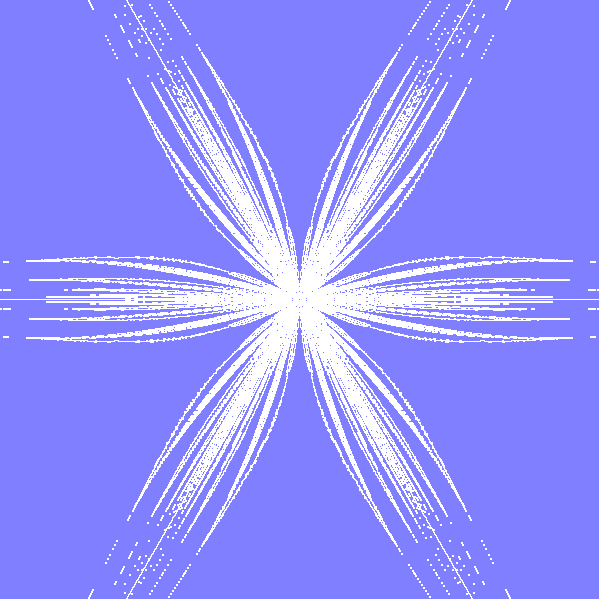

In [70]:
newton_fractal(0.75, 600)

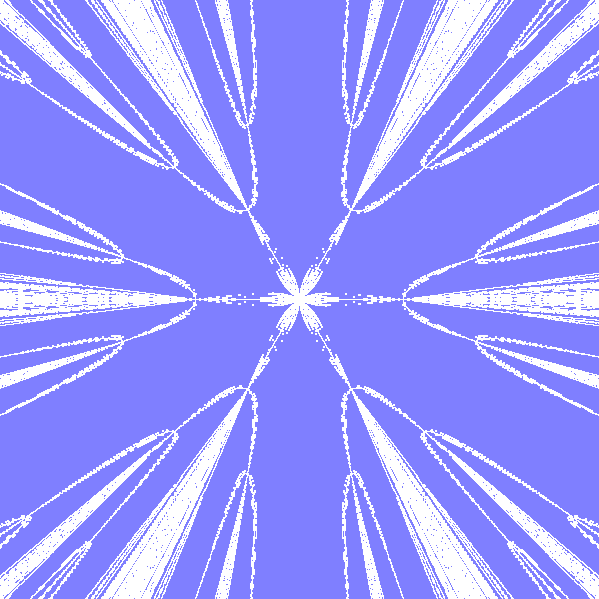

In [71]:
newton_fractal(5, 600)

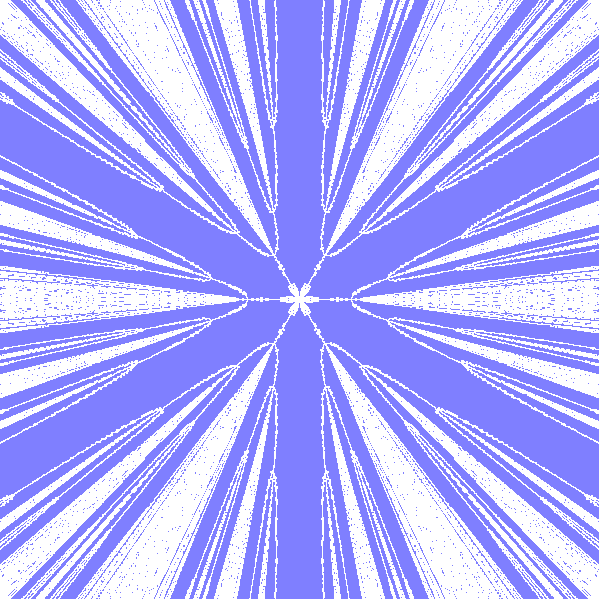

In [72]:
newton_fractal(10, 600)

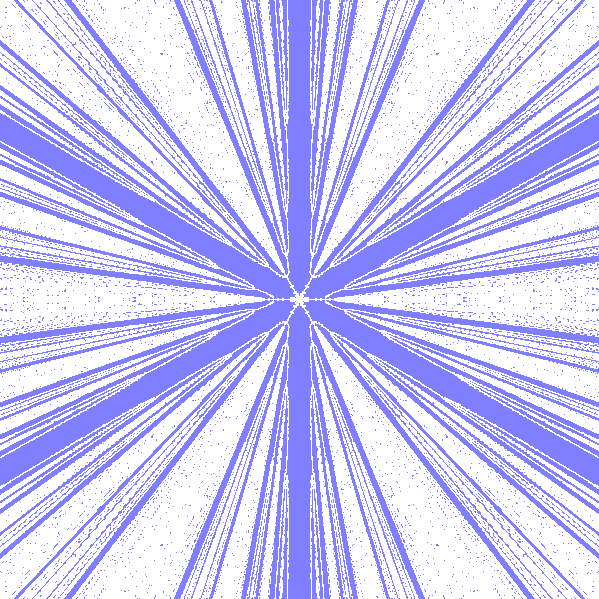

In [73]:
newton_fractal(20, 600)

Just like in the rainbow pictures, we can get better pictures by generating a larger image and then scaling it back down. Here are some pictures:

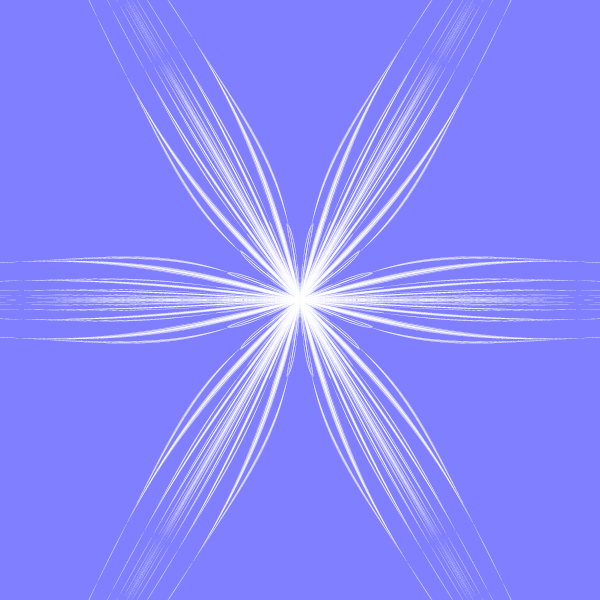

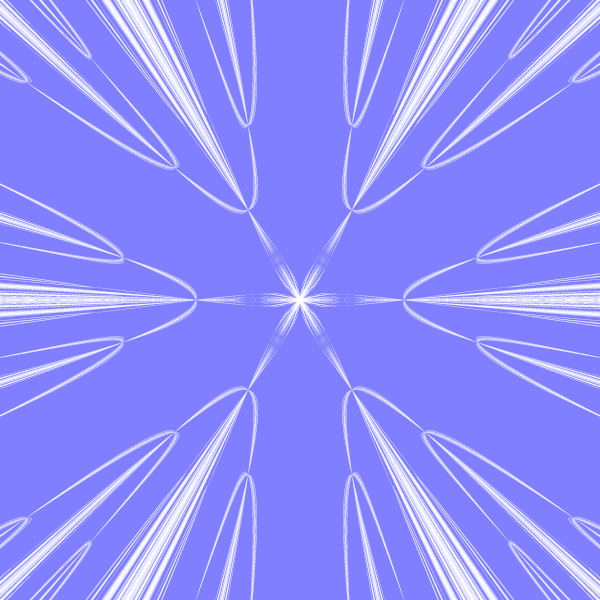

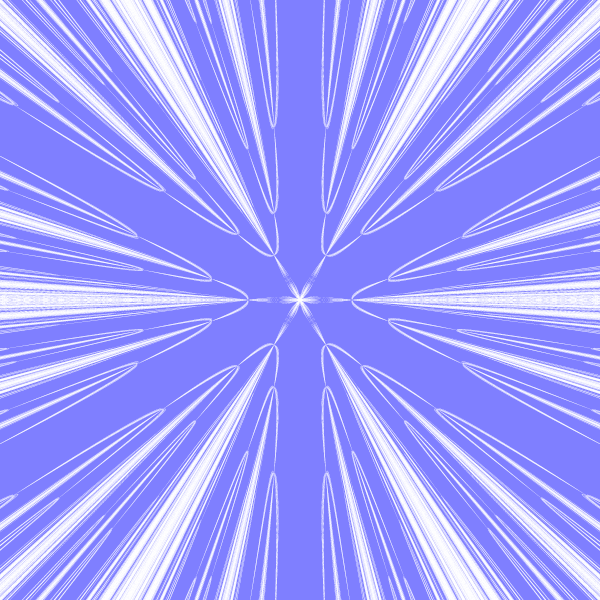

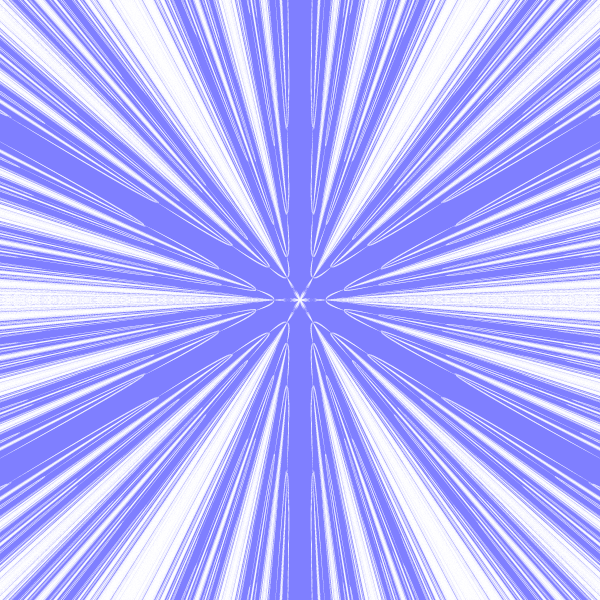

"Enter warp speed, Scottie!" (Apologies for the Star Trek joke.)

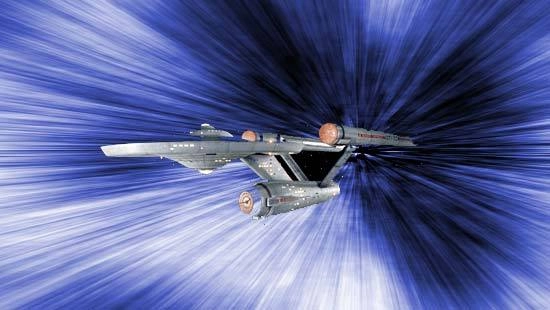

Here is the code I used to generate the large pictures used above:

In [75]:
# R = 10
# N = 8000
# img = newton_fractal(20, 8000)
# img.save(f'snowflake_R{R:0.2f}_N{N}.png')

## A quadratic example in 2D

This one doesn't generate nice pictures but at least shows that there are quadratic 2D examples that have complicated behaviour. (From the above you might guess that quadratic polynomials are always boring. This is clearly the case in 1D, and is also true for complex 1D polynomials. But in the real 2D case, there are examples with more interesting behavior.

(It would be interesting to study the parameter space of quadratic polynomials $\mathbb R^2 \to \mathbb R^2$, and understand the dynamics of Newton's method as much as possible.)

In [76]:
f(x,y) = (
    (2*x-1)*(x-y+1)-4,
    (x+y-1)*(x-2*y+1)+1,
)

Here we draw the two zero level sets. The intersections are the roots:

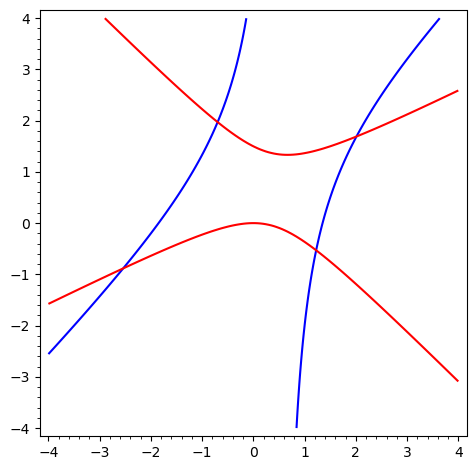

In [77]:
R = 4
implicit_plot(f[0],(-R,R),(-R,R)) + implicit_plot(f[1],(-R,R),(-R,R), color='red')

We can compute the action of one Newton's method step:

In [78]:
nm = newton_2d_one_iterate(f)
show(nm)

(x, y) |--> (-(2*(2*x + 1)*y^2 + 5*x^2 - (8*x^2 + 5*x + 20)*y - 5*x + 15)/((16*x + 9)*y - 8*y^2 - 9*x - 3), (2*(4*x + 1)*y^2 - 4*y^3 - x^2 + (x - 5)*y + 10*x)/((16*x + 9)*y - 8*y^2 - 9*x - 3))

Here is the same function but in factored form:

In [79]:
nm[0] = nm[0].factor()
nm[1] = nm[1].factor()
show(nm)

(x, y) |--> ((8*x^2*y - 4*x*y^2 - 5*x^2 + 5*x*y - 2*y^2 + 5*x + 20*y - 15)/(16*x*y - 8*y^2 - 9*x + 9*y - 3), (8*x*y^2 - 4*y^3 - x^2 + x*y + 2*y^2 + 10*x - 5*y)/(16*x*y - 8*y^2 - 9*x + 9*y - 3))

We find the roots using Sage's `solve` (rather than Newton's method):

In [80]:
sol = solve([f[0]==0, f[1]==0],[x,y], solution_dict=True)
roots = [vector(RDF, (s[x], s[y])) for s in sol]
roots

[(1.225739275301958, -0.5300715214564369),
 (-2.541245791245791, -0.8836206896551724),
 (2.013178294573644, 1.691456903127384),
 (-0.6976715835669877, 1.972235294117647)]

Here we check how close each image of a "root" is to zero.

In [81]:
for r in roots:
    print(f(*r))

(2.6101749739382285e-07, 5.3498394270157235e-08)
(-8.551398900102924e-07, -3.0245834525821635e-07)
(2.4202031134734625e-07, 3.212672322616683e-07)
(2.921192177041121e-08, -6.904307192634462e-08)


The roots aren't actually as close to roots that we get with Newton's method. Here we improve our roots:

In [82]:
roots = [newtons_method_2d_np(f, *r, 30) for r in roots]
for r in roots:
    print(f(*r))

(-8.881784197001252e-16, -1.5543122344752192e-15)
(-1.3322676295501878e-15, -1.5543122344752192e-15)
(0.0, -1.1102230246251565e-15)
(-1.7763568394002505e-15, 7.771561172376096e-16)


In [83]:
roots

[(1.2257392405056573, -0.5300715085541613),
 (-2.5412459335841167, -0.8836207221816984),
 (2.0131782779831835, 1.6914569520164444),
 (-0.6976715849047238, 1.972235278719415)]

We choose some arbitrary colors for the roots.

In [84]:
roots_to_colors = {roots[0]:'red', roots[1]:'orange',
                   roots[2]:'yellow', roots[3]:'green'}

We plot the Newton fractal below.

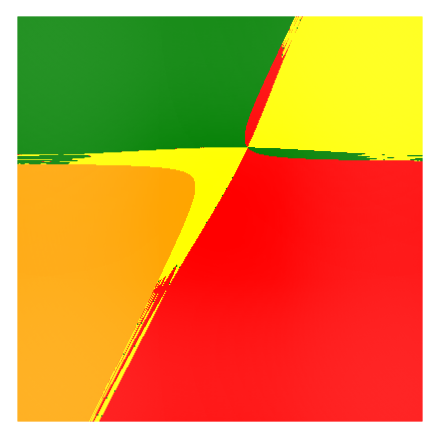

In [85]:
R = 2
N = 406
x_ls = np.linspace(-R, R, N)
y_ls = np.linspace(-R, R, N)
xmesh, ymesh = np.meshgrid(x_ls,y_ls)
xn, yn = newtons_method_2d_np(f, xmesh, ymesh, 20)
epsilon = 1/100
color_points_2d(xmesh, ymesh, xn, yn, roots_to_colors, epsilon, 
                args=dict(size=1, figsize=6, aspect_ratio=1, axes=False))

It is not clear exactly what is going on above, but at least it is clear that the regions are not simple sectors. (Perhaps the orange region is a component of a hyperbola?)